# Natural Computing - Assignment 1 - Evolutionary Computation
## Exercise 4 - Role of selection in GA's
#### Submission by group 25 (Chihab Amghane, Max Driessen, Jordy Naus)

This file contains our solution to exercise 4 of the "Evolutionary Computation" assignment of the Natural Computing course.<br><br>


### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Functions for GA (random initialization, mutation)

In [2]:
def generate_bit_sequence(length):
    return np.random.randint(2,size=length)

In [3]:
def copy_and_invert(bitsequences, prob):
    inverted_bit_seq = 1 - bitsequences
    prob_array = np.random.choice([0,1],len(bitsequences), p=[1-prob,prob])
    copy = np.where(prob_array == 1, inverted_bit_seq, bitsequences)
    return copy

### Implementation of the Counting Ones problem with a (1+1)-GA

In [8]:
## implementation of the counting ones problem with (1+1) GA 
def counting_ones_problem(bit_string_length, mutation_rate,number_of_iterations):
    all_fitnesses = []
    best_fitness = 0
    goal = bit_string_length
    x = generate_bit_sequence(bit_string_length)
    for i in range(number_of_iterations):
        
        x_m = copy_and_invert(x, mutation_rate)
        
        evaluated_xm = sum(x_m)
        ## replace next 2 lines by simply "x = x_m" for 4c
        if (goal - sum(x)) > (goal - evaluated_xm):
            x = x_m
        
        all_fitnesses.append(sum(x)) 

    return all_fitnesses

### Run the (1+1)-GA 10 times

In [5]:
fitnesses = []
for i in range(10):
    fitnesses.append(counting_ones_problem(100,1/100,1500))

### Exercise 4a: single run of the GA

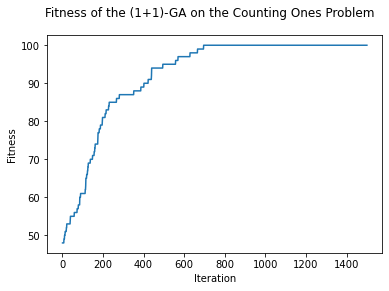

In [6]:
x_axis = [x+1 for x in range(1500)]
plt.plot(x_axis, fitnesses[1])
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.suptitle("Fitness of the (1+1)-GA on the Counting Ones Problem")
plt.show()

### Exercise 4b: 10 runs of the GA

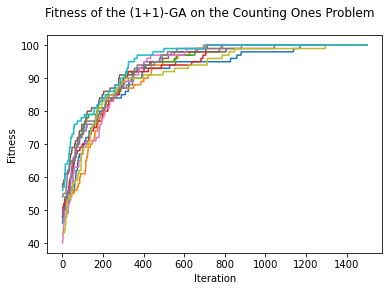

In [7]:
for fitness in fitnesses:    
    x_axis = [x+1 for x in range(1500)]
    plt.plot(x_axis, fitness)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.suptitle("Fitness of the (1+1)-GA on the Counting Ones Problem")
plt.show()

### Exercise 4c: always replace

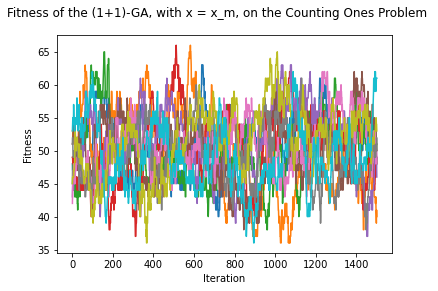

In [9]:
fitnesses = []
for i in range(10):
    fitnesses.append(counting_ones_problem(100,1/100,1500))
for fitness in fitnesses:    
    x_axis = [x+1 for x in range(1500)]
    plt.plot(x_axis, fitness)

plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.suptitle("Fitness of the (1+1)-GA, with x = x_m, on the Counting Ones Problem ")
plt.show()